# Aplicação de Técnicas de Machine Learning para a Detecção de Doenças Hepáticas

Projeto realizado para o trabalho de conclusão de curso (TCC) do MBA Executivo em Business Analytics do Instituto de Pós-graduação e Graduação (IPOG). Informações relativas ao conjunto de dados estão destacadas no capítulo 3 do documento "TCC - Luis Felipe Santos Chagas".

Título do trabalho: Aplicação e comparação das Técnicas de Regressão Logística, Random Forest e SVM para a Detecção de Doenças Hepáticas.

## 1 - Preparação dos dados:

1. Importação das bibliotecas utilizadas;
2. Carregamento dos dados;
3. Eliminação de observações com valores nulos;
4. Análise do tipo dos dados.

In [1]:
# Bibliotecas utilizadas no Projeto

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import imblearn
from imblearn.over_sampling import SMOTE

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando o conjunto de dados
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names = ['Age',
                                                                     'Gender',
                                                                     'TB',
                                                                     'DB',
                                                                     'Alkphos',
                                                                     'Sgpt',
                                                                     'Sgot',
                                                                     'TP',
                                                                    'ALB',
                                                                    'A_G_Ratio',
                                                                    'Liver_Disease'])

In [3]:
# Retornando 5 registros aleatórias do conjunto de dados
df.sample(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A_G_Ratio,Liver_Disease
524,29,Male,0.8,0.2,156,12,15,6.8,3.7,1.10,2
51,34,Female,0.6,0.1,161,15,19,6.6,3.4,1.00,1
251,33,Male,0.9,0.8,680,37,40,5.9,2.6,0.80,1
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [4]:
# Informações gerais do conjunto de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            583 non-null    int64  
 1   Gender         583 non-null    object 
 2   TB             583 non-null    float64
 3   DB             583 non-null    float64
 4   Alkphos        583 non-null    int64  
 5   Sgpt           583 non-null    int64  
 6   Sgot           583 non-null    int64  
 7   TP             583 non-null    float64
 8   ALB            583 non-null    float64
 9   A_G_Ratio      579 non-null    float64
 10  Liver_Disease  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# Apagando linhas com valores nulos e resetando o índice
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            579 non-null    int64  
 1   Gender         579 non-null    object 
 2   TB             579 non-null    float64
 3   DB             579 non-null    float64
 4   Alkphos        579 non-null    int64  
 5   Sgpt           579 non-null    int64  
 6   Sgot           579 non-null    int64  
 7   TP             579 non-null    float64
 8   ALB            579 non-null    float64
 9   A_G_Ratio      579 non-null    float64
 10  Liver_Disease  579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 49.9+ KB


> Para a coluna A_G_Ratio, temos apenas 4 valores nulos. Essas observações serão eliminadas do conjunto de dados. Devido à baixa quantidade de valores nulos, não haverá nenhum tipo de inputação de dados.

## 2 - Análise Exploratória dos Dados

### 2.1 - Variáveis numéricas

In [6]:
# Separando as variáveis numéricas
num =  ['Age', 'TB', 'DB','Alkphos','Sgpt','Sgot','TP','ALB','A_G_Ratio']  

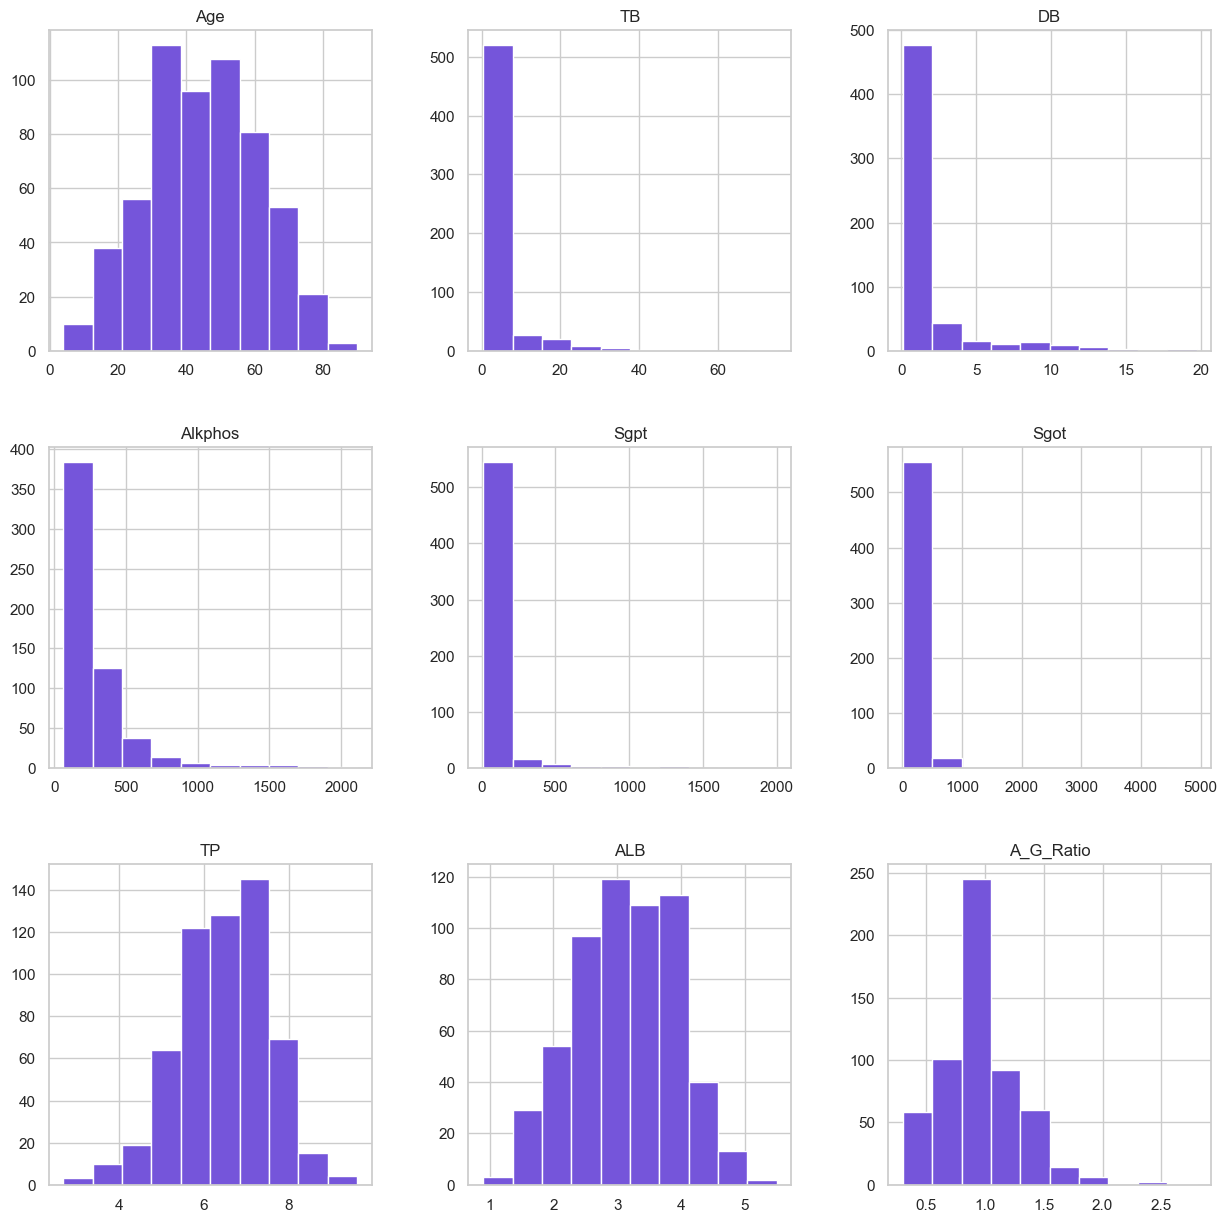

In [7]:
# Histograma das variáveis numéricas
df[num].hist(color = '#7555da', figsize = (15, 15), bins = 10);

In [8]:
# Resumo estatístico das variáveis numéricas
resumo = round(df[num].describe(), 1)
resumo.loc['mean': 'max']

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A_G_Ratio
mean,44.8,3.3,1.5,291.4,81.1,110.4,6.5,3.1,0.9
std,16.2,6.2,2.8,243.6,183.2,289.9,1.1,0.8,0.3
min,4.0,0.4,0.1,63.0,10.0,10.0,2.7,0.9,0.3
25%,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.7
50%,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.9
75%,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.1
max,90.0,75.0,19.7,2110.0,2000.0,4929.0,9.6,5.5,2.8


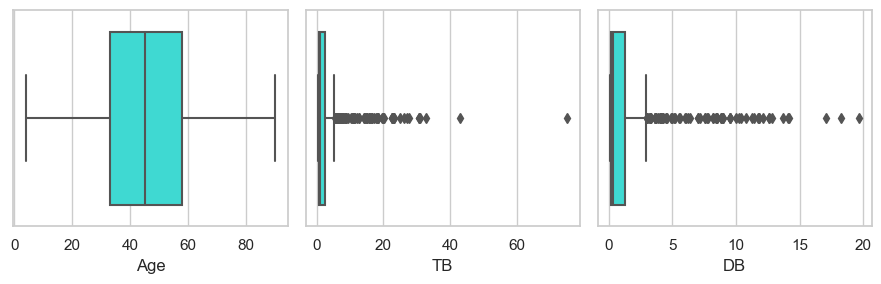

In [9]:
# Boxplot das variáveis numéricas
plt.figure(figsize = (9, 3))

plt.subplot(1, 3, 1)
sns.boxplot(x = df['Age'], color = '#25f3ea')

plt.subplot(1, 3, 2)
sns.boxplot(x = df['TB'], color = '#25f3ea')

plt.subplot(1, 3, 3)
sns.boxplot(x = df['DB'], color = '#25f3ea')

plt.tight_layout()    

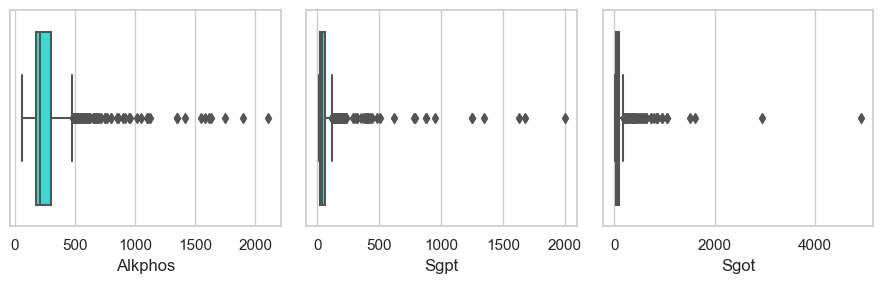

In [10]:
plt.figure(figsize = (9, 3))

plt.subplot(1, 3, 1)
sns.boxplot(x = df['Alkphos'], color = '#25f3ea')

plt.subplot(1, 3, 2)
sns.boxplot(x = df['Sgpt'], color = '#25f3ea')

plt.subplot(1, 3, 3)
sns.boxplot(x = df['Sgot'], color = '#25f3ea')

plt.tight_layout() 

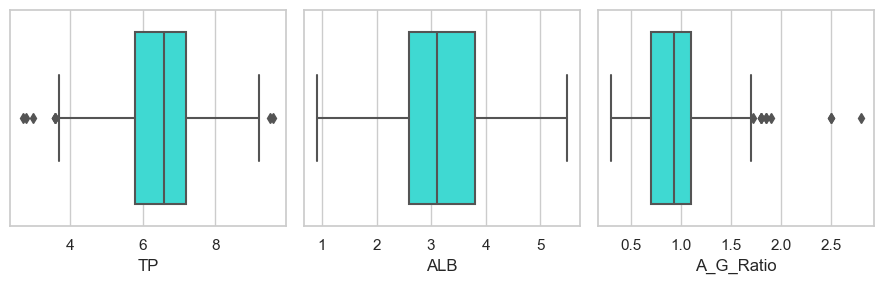

In [11]:
plt.figure(figsize = (9, 3))

plt.subplot(1, 3, 1)
sns.boxplot(x = df['TP'], color = '#25f3ea')

plt.subplot(1, 3, 2)
sns.boxplot(x = df['ALB'], color = '#25f3ea')

plt.subplot(1, 3, 3)
sns.boxplot(x = df['A_G_Ratio'], color = '#25f3ea')

plt.tight_layout() 

> Das análises dos histogramas, boxplots e resumos estatísticos, podemos destacar:

1. Alguns atributos apresentam outliers. São eles: `TB`, `DB`, `Alkphos`, `Sgpt` e `Sgot`. Esses atributos serão tratados posteriormente;  

2. Existem colunas com distribuições próximas à distribuição normal;  

3. Existe diferença de grandeza entre os atributos. Por isso, será necessário realizar a padronização nos dados.

### 2.2 - Variável Categórica

In [12]:
sexo = pd.DataFrame(df['Gender'].value_counts())
sexo

,Gender
Male,439
Female,140


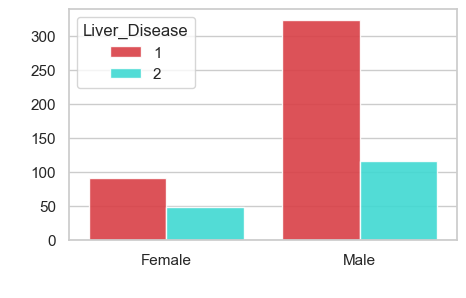

In [13]:
plt.figure(figsize = (5, 3))
chart = sns.countplot(data = df,
                     x = 'Gender',
                     palette = ['#F3252E', '#25f3ea'],
                     hue = 'Liver_Disease',
                     orient = 'v',
                     alpha = 0.9)

# Labels
sns.set(font_scale = 0.8)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel(' ')
chart.set_ylabel(' ');


### 2.3 - Variável Alvo

Coluna Liver_Disease

In [14]:
# Contagem dos valores da variável alvo:
# 1 - Não presença de algum tipo de doença hepática;
# 2 - Presença de algum tipo de doença hepática

df['Liver_Disease'].value_counts()

1    414
2    165
Name: Liver_Disease, dtype: int64

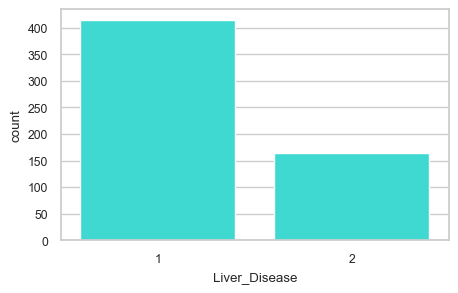

In [15]:
plt.figure(figsize = (5, 3))
sns.countplot(x = df['Liver_Disease'], color = '#25f3ea');

> A variável alvo possui um desbalanceamento. Será aplicado o SMOTE, técnica de oversampling.

### 2.4 - Análise da correlação das variáveis

Variáveis preditivas com altas correlações entre elas devem ser eliminadas do conjunto de dados, para evitar viés (excesso de importância para a informação).

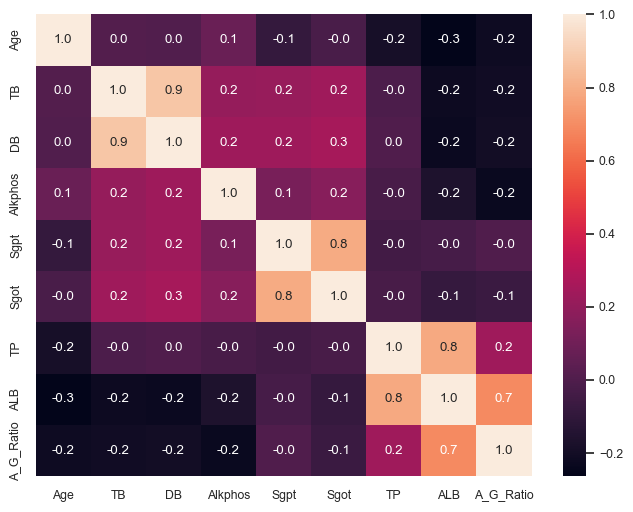

In [16]:
# Heatmap

plt.figure(figsize = (8, 6))
sns.heatmap(df[num].corr(), annot = True, fmt = '.1f');

In [17]:
# Eliminando as colunas com maiores correlações:
df.drop(['DB', 'ALB'], inplace = True, axis=1)

In [18]:
df.sample(5)

,Age,Gender,TB,Alkphos,Sgpt,Sgot,TP,A_G_Ratio,Liver_Disease
165,48,Male,4.5,282,13,74,7.0,0.52,1
202,38,Female,0.8,145,19,23,6.1,1.03,2
221,47,Male,0.9,265,40,28,8.0,1.00,1
107,36,Male,0.8,158,29,39,6.0,0.50,2
505,46,Male,20.0,254,140,540,5.4,1.20,1


## 3 - Limpeza e Pré-processamento dos Dados

### 3.1 - Tratamento de Valores Duplicados

In [19]:
# Buscando no dataset registros idênticos (com todas as informações iguais)
df[df.duplicated(keep = False)]

,Age,Gender,TB,Alkphos,Sgpt,Sgot,TP,A_G_Ratio,Liver_Disease
18,40,Female,0.9,293,232,245,6.8,0.80,1
19,40,Female,0.9,293,232,245,6.8,0.80,1
25,34,Male,4.1,289,875,731,5.0,1.10,1
26,34,Male,4.1,289,875,731,5.0,1.10,1
33,38,Female,2.6,410,59,57,5.6,0.80,2
34,38,Female,2.6,410,59,57,5.6,0.80,2
54,42,Male,8.9,272,31,61,5.8,0.50,1
55,42,Male,8.9,272,31,61,5.8,0.50,1
61,58,Male,1.0,158,37,43,7.2,1.00,1
62,58,Male,1.0,158,37,43,7.2,1.00,1


> O conjunto de dados apresenta diversos valores duplicados. É preciso removê-los.

In [20]:
df.shape

(579, 9)

In [21]:
# Removendo os valores duplicados e resetando os índices
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)

In [22]:
df.shape

(566, 9)

### 3.2 - Substituição de valores

* Codificação da variável categórica `Gender`, utilizando a técnica de Label Encoding.

In [23]:
# Instanciando um objeto do tipo LabelEncoder
le = LabelEncoder()

In [24]:
# Aplicando o LabelEncoder
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
print(f'As classes para a variável Gender são: {list(le.classes_)}')

As classes para a variável Gender são: ['Female', 'Male']


In [25]:
df.sample(5)

,Age,Gender,TB,Alkphos,Sgpt,Sgot,TP,A_G_Ratio,Liver_Disease
280,74,0,0.9,234,16,19,7.9,1.00,1
19,51,1,2.2,610,17,28,7.3,0.55,1
99,63,1,0.5,170,21,28,5.5,0.80,1
75,58,0,2.4,915,60,142,4.7,0.60,1
413,53,0,0.7,182,20,33,4.8,0.60,1


In [26]:
df.Gender.value_counts()

1    428
0    138
Name: Gender, dtype: int64

### 3.3 - Tratamento de Outliers

Como dito anteriormente, as colunas `TB`, `DB`, `Alkphos`, `Sgpt` e `Sgot` possuem alguns valores muito distantes de suas respectivas médias e medianas, ou seja, são prováveis outliers. Para essas colunas, pode-se perceber que os valores extremos aparecem poucas vezes. Os outliers das colunas `Alkphos`, `Sgpt` e `Sgot`apresentam uma ordem de grandeza muito maior em relação à média e mediana deles. Ainda assim, realizando pesquisas na área, é possivel existir valores bastante altos para essas variáveis. Portanto, a **decisão tomada** será realizar a separação dessas variáveis em categorias. As categorias serão:

**Categoria Utilizadas:**

1. Abaixo do vr (0) - abaixo do valor de referência
2. Dentro do vr (1) - dentro do valor de referência
3. Valor Elevado (2) - até 10x o valor de referência
3. Valor alto (3) - até 100x o valor de referência
4. Valor muito alto (4) - acima de 100x o valor de referência


Para aplicar a categorização das variáveis será utilizado os valores de referência dos marcadores bioquímicos.

**Valores de Referência:**

1. Bilirrubina Total: entre 0.2 e 1.2
2. fosfatase alcalina: entre 40 e 150
3. Alanina Aminotransferase: entre 7 e 56
4. Aspartato Aminotransferase: entre 5 e 40

Alguns desses valores variam de acordo com o laboratório, a idade do paciente e o sexo. Porém, para simplificar, serão utilizados esses valores de referência para a categorização dos dados. 

In [27]:
lista_categorias = [0, 1, 2, 3, 4]

In [28]:
# Bilirrubina Total
df['TB_cat'] = pd.cut(x = df['TB'], bins = [0, 0.2, 1.2, 10*1.2, 100*1.2, 1000*1.2], labels = lista_categorias)
df['TB_cat'].value_counts()

1    322
2    202
3     42
0      0
4      0
Name: TB_cat, dtype: int64

In [29]:
# Fosfatase alcalina
df['Alkphos_cat'] = pd.cut(x = df['Alkphos'], bins = [0, 40, 150, 10*150, 100*150, 1000*150], labels = lista_categorias)
df['Alkphos_cat'].value_counts()

2    501
1     58
3      7
0      0
4      0
Name: Alkphos_cat, dtype: int64

In [30]:
# Alanina Aminotransferase
df['Sgpt_cat'] = pd.cut(x = df['Sgpt'], bins = [0, 7, 56, 10*56, 100*56, 1000*56], labels = lista_categorias)
df['Sgpt_cat'].value_counts()

1    409
2    146
3     11
0      0
4      0
Name: Sgpt_cat, dtype: int64

In [31]:
# Aspartato Aminotransferase
df['Sgot_cat'] = pd.cut(x = df['Sgot'], bins = [0, 5, 40, 10*40, 100*40, 1000*40], labels = lista_categorias)
df['Sgot_cat'].value_counts()

1    278
2    259
3     28
4      1
0      0
Name: Sgot_cat, dtype: int64

In [32]:
# Transformando as novas colunas em dados inteiros
df = df.astype({'TB_cat': 'int32',
                     'Alkphos_cat': 'int32',
                     'Sgpt_cat': 'int32',
                     'Sgot_cat': 'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            566 non-null    int64  
 1   Gender         566 non-null    int32  
 2   TB             566 non-null    float64
 3   Alkphos        566 non-null    int64  
 4   Sgpt           566 non-null    int64  
 5   Sgot           566 non-null    int64  
 6   TP             566 non-null    float64
 7   A_G_Ratio      566 non-null    float64
 8   Liver_Disease  566 non-null    int64  
 9   TB_cat         566 non-null    int32  
 10  Alkphos_cat    566 non-null    int32  
 11  Sgpt_cat       566 non-null    int32  
 12  Sgot_cat       566 non-null    int32  
dtypes: float64(3), int32(5), int64(5)
memory usage: 46.6 KB


### 3.4 - Padronização dos dados

##### Standard Scaler

In [33]:
df_num = df[['Age', 'TP', 'A_G_Ratio']]
df_num.sample(5)

,Age,TP,A_G_Ratio
499,60,6.7,0.80
33,17,7.2,1.18
117,28,6.9,1.40
289,54,7.9,0.90
203,49,7.0,1.50


In [34]:
# Instanciando um objeto do tipo StandardScaler 
stdscaler = StandardScaler()

In [35]:
# Aplicando o StandardScaler
scaler = stdscaler.fit_transform(df_num)

df_scaler = pd.DataFrame(scaler, columns=['Age', 'TP', 'A_G_Ratio'])
df_scaler.head()

,Age,TP,A_G_Ratio
0,1.236928,0.280819,-0.150315
1,1.052432,0.925059,-0.651328
2,1.052432,0.464887,-0.181628
3,0.806437,0.280819,0.162818
4,1.667418,0.740991,-1.715981


In [36]:
df.drop(['Age', 'TP', 'A_G_Ratio', 'TB', 'Alkphos', 'Sgpt', 'Sgot'], inplace = True, axis = 1)
df.head()

,Gender,Liver_Disease,TB_cat,Alkphos_cat,Sgpt_cat,Sgot_cat
0,0,1,1,2,1,1
1,1,1,2,2,2,2
2,1,1,2,2,2,2
3,1,1,1,2,1,1
4,1,1,2,2,1,2


In [37]:
# Concatenando os dados já padronizados no dataframe
df_final = pd.concat([df, df_scaler], axis = 1)
df_final.head()

,Gender,Liver_Disease,TB_cat,Alkphos_cat,Sgpt_cat,Sgot_cat,Age,TP,A_G_Ratio
0,0,1,1,2,1,1,1.236928,0.280819,-0.150315
1,1,1,2,2,2,2,1.052432,0.925059,-0.651328
2,1,1,2,2,2,2,1.052432,0.464887,-0.181628
3,1,1,1,2,1,1,0.806437,0.280819,0.162818
4,1,1,2,2,1,2,1.667418,0.740991,-1.715981


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         566 non-null    int32  
 1   Liver_Disease  566 non-null    int64  
 2   TB_cat         566 non-null    int32  
 3   Alkphos_cat    566 non-null    int32  
 4   Sgpt_cat       566 non-null    int32  
 5   Sgot_cat       566 non-null    int32  
 6   Age            566 non-null    float64
 7   TP             566 non-null    float64
 8   A_G_Ratio      566 non-null    float64
dtypes: float64(3), int32(5), int64(1)
memory usage: 28.9 KB


### 3.5 - Divisão dos Dados e Balanceamento de Classe

Divisão dos dados, com proporção 80/20.

Para o balanceamento da variável alvo, utilizaremos o SMOTE, uma estratégia de oversampling, que aumenta o número de exemplos da classe minoritária, criando dados sintéticos, utilizando como base os dados existentes.

In [39]:
# Separação da variável alvo
y = df_final['Liver_Disease']

In [40]:
# Separação das variáveis preditoras
x = df_final.drop('Liver_Disease', axis=1)

In [41]:
# Divisão em teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 1,
                                                        stratify = y)

In [42]:
# Instanciando um objeto do tipo SMOTE
smote = SMOTE(k_neighbors = 3, random_state = 1)

In [43]:
# Aplicando o SMOTE
x, y = smote.fit_resample(x_treino, y_treino)

## 4 - Aplicando Machine Learning

### 4.1 - Modelo: Regressão Logística (Versão 1)

In [44]:
# Definição da lista de hiperparâmetros
tuned_params_reg1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

#Testando os melhores parâmetros para o modelo de Regressão Logística
modelo_reg1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_reg1, 
                         scoring = 'accuracy', 
                         n_jobs = -1)
                          

# Treinamento do modelo
modelo_reg1.fit(x, y)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [45]:
modelo_reg1.best_params_

{'C': 0.01, 'penalty': 'l2'}

#### 4.1.2 - Teste com Cross Validation

In [46]:
# Teste de performance com a validação cruzada:

regr_log = LogisticRegression(C=0.01, penalty='l2')
resultado_regr_log = cross_val_score(regr_log, x, y, cv=5)

print(f'Resultado preliminar para regressão logística: {round(resultado_regr_log.mean(), 2)}')

Resultado preliminar para regressão logística: 0.73


#### 4.1.3 - Feature Importance

Por meio da técnica de permutation importance, será calculada a importância de cada atributo na predição da variável alvo, para a Regressão Logística.

In [47]:
perm_importance = permutation_importance(modelo_reg1, x, y)

In [48]:
feature_names = x.columns
features = np.array(feature_names)

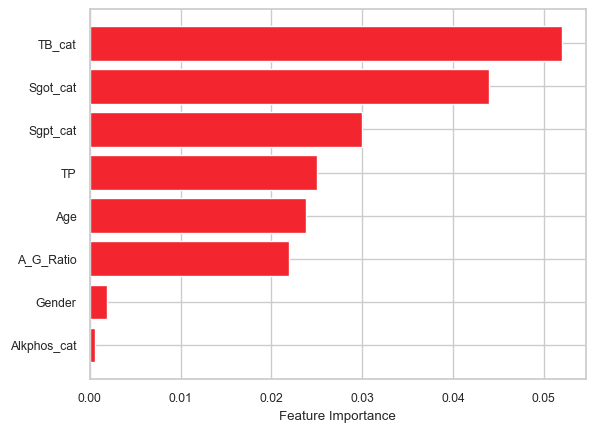

In [49]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color='#F3252E')
plt.xlabel("Feature Importance");

In [50]:
# Testes com o feature importance - Regressão Logística
# Retirando os 3 atributos com menos importância

x_v2rl = x.drop(['Alkphos_cat', 'Gender', 'TP'], axis=1)

In [51]:
# Definição da lista de hiperparâmetros
tuned_params_reg1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

#Testando os melhores parâmetros para o modelo de Regressão Logística
modelo_reg2 = GridSearchCV(LogisticRegression(), 
                         tuned_params_reg1, 
                         scoring = 'accuracy', 
                         n_jobs = -1)
                          

# Treinamento do modelo
modelo_reg2.fit(x_v2rl, y)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [52]:
modelo_reg2.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [53]:
regr_log = LogisticRegression(C=0.1, penalty='l2')

resultado_regr_log_v2 = cross_val_score(regr_log, x_v2rl, y, cv=5)

print(f'Resultado preliminar para regressão logística (versão 2): {round(resultado_regr_log_v2.mean(), 2)}')

Resultado preliminar para regressão logística (versão 2): 0.73


> Não houve variação significativa de performance.

## 4.2 - Modelo - Random Forest (Versão 1)
O mesmo processo será realizado para o algoritmo Random Forest.

In [54]:
# Grid de hiperparâmetros
tuned_params_rf1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_rf1 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_rf1, 
                               n_iter = 40, 
                               scoring = 'accuracy', 
                               n_jobs  = -1)

# Treina o modelo
modelo_rf1.fit(x, y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [55]:
modelo_rf1.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1}

#### 4.2.1- Teste com Cross Validation

In [56]:
random_f = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1)

resultado_random_f = cross_val_score(random_f, x, y, cv=5)

print(f'Resultado preliminar para Random Forest: {round(resultado_random_f.mean(), 2)}')

Resultado preliminar para Random Forest: 0.78


#### 4.2.2 - Feature Importance

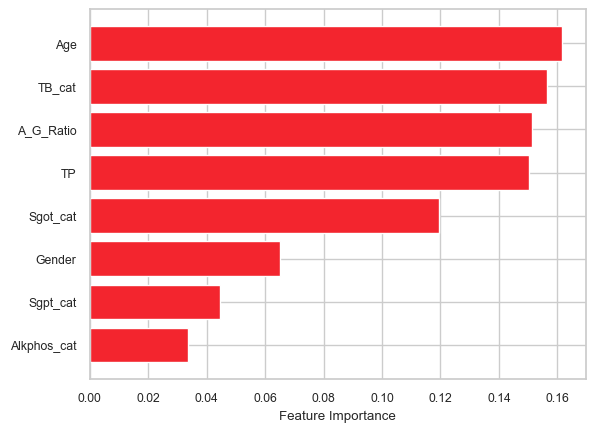

In [57]:
perm_importance = permutation_importance(modelo_rf1, x, y)

feature_names = x.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color='#F3252E')
plt.xlabel("Feature Importance");

In [58]:
## Testes com o feature importance - Random Forest
x_v2rf = x.drop(['Alkphos_cat', 'Sgpt_cat', 'Gender'], axis=1)

In [59]:
# Grid de hiperparâmetros
tuned_params_rf1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_rf2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_rf1, 
                               n_iter = 40, 
                               scoring = 'accuracy', 
                               n_jobs  = -1)

# Treina o modelo
modelo_rf2.fit(x_v2rf, y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [60]:
modelo_rf2.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1}

In [61]:
random_f = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1)

resultado_random_f_v2 = cross_val_score(random_f, x_v2rf, y, cv=5)

print(f'Resultado preliminar para Random Forest (versão 2): {round(resultado_random_f_v2.mean(), 2)}')

Resultado preliminar para Random Forest (versão 2): 0.78


## 4.3 - Modelo - SVM (Versão 1)
usaremos o SVC (Support Vector Classifier)

In [62]:
# Grid de hiperparâmetros
tuned_params_svm1 = {'C': [0.001, 0.01, 0.1, 1, 10], 
                   'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}

# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_svm1 = RandomizedSearchCV(SVC(), 
                               tuned_params_svm1, 
                               n_iter = 40, 
                               scoring = 'accuracy', 
                               n_jobs  = -1)

# Treina o modelo
modelo_svm1.fit(x, y)

RandomizedSearchCV(estimator=SVC(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'sigmoid', 'linear',
                                                   'poly']},
                   scoring='accuracy')

In [63]:
modelo_svm1.best_params_

{'kernel': 'rbf', 'C': 0.1}

#### 4.3.1 - Teste com Cross Validation

In [64]:
svm = SVC(kernel='rbf', C=0.1)

resultado_svm = cross_val_score(svm, x, y, cv=5)

print(f'Resultado preliminar para SVM: {round(resultado_svm.mean(), 2)}')

Resultado preliminar para SVM: 0.73


#### 4.3.2 - Feature importance

In [65]:
perm_importance = permutation_importance(modelo_svm1, x, y)

In [66]:
feature_names = x.columns
features = np.array(feature_names)

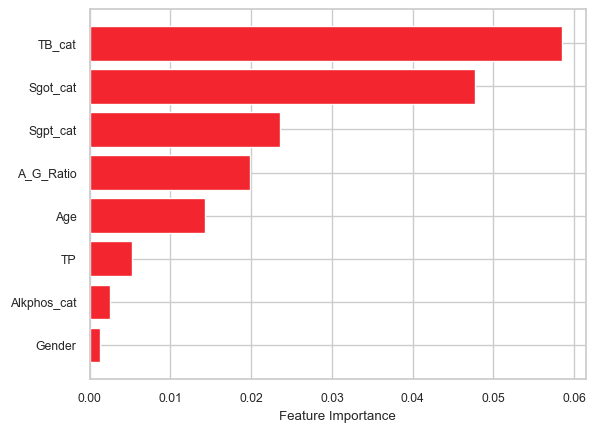

In [67]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color='#F3252E')
plt.xlabel("Feature Importance");

In [68]:
## Testes com o feature importance - SVM
x_v2svm = x.drop(['Gender', 'Alkphos_cat', 'TP'], axis=1)

In [69]:
# Grid de hiperparâmetros
tuned_params_svm1 = {'C': [0.001, 0.01, 0.1, 1, 10], 
                   'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}

# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_svm2 = RandomizedSearchCV(SVC(), 
                               tuned_params_svm1, 
                               n_iter = 40, 
                               scoring = 'accuracy', 
                               n_jobs  = -1)

# Treina o modelo
modelo_svm2.fit(x_v2svm, y)

RandomizedSearchCV(estimator=SVC(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'sigmoid', 'linear',
                                                   'poly']},
                   scoring='accuracy')

In [70]:
modelo_svm2.best_params_

{'kernel': 'poly', 'C': 10}

In [71]:
svm = SVC(kernel='poly', C=10)

resultado_svm_v2 = cross_val_score(svm, x_v2svm, y, cv=5)

print(f'Resultado preliminar para SVM: {round(resultado_svm_v2.mean(), 2)}')

Resultado preliminar para SVM: 0.73


> Para o teste de feature importance n SVM, o modelo foi treinado, retirando, um a um, os atributos com menos importância. Não houve variação significativa de performance, assim como a Regressão Logística.

## 5 - Avaliação dos modelos em teste:

Duas métricas serão avaliadas:
1. Acurácia
2. Matriz de Confusão

In [72]:
# Retornando os melhores modelos criados de cada algoritmo:

regr_log = LogisticRegression(C=0.1, penalty='l2')
random_f = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1)
svm = SVC(kernel='poly', C=10)

regr_log.fit(x_v2rl, y)
random_f.fit(x_v2rf, y)
svm.fit(x_v2svm, y);

In [73]:
x_teste_v2rl = x_teste.drop(['Gender', 'Alkphos_cat', 'TP'], axis=1)
x_teste_v2rf = x_teste.drop(['Alkphos_cat', 'Sgpt_cat', 'Gender'], axis=1)
x_teste_v2svm = x_teste.drop(['Gender', 'Alkphos_cat', 'TP'], axis=1)

In [74]:
# Previsão dos modelos:

y_pred_regr_log = regr_log.predict(x_teste_v2rl)
y_pred_random_f = random_f.predict(x_teste_v2rf)
y_pred_svm = svm.predict(x_teste_v2svm)

# Acurácia em teste dos modelos
acuracia_regr_log = accuracy_score(y_teste, y_pred_regr_log)
acuracia_random_f = accuracy_score(y_teste, y_pred_random_f)
acuracia_svm = accuracy_score(y_teste, y_pred_svm)

print(f'Acurácia em teste para o modelo 1 - Regressão Logística: {round(acuracia_regr_log, 2)}')
print(f'Acurácia em teste para o modelo 2 - Random Forest: {round(acuracia_random_f, 2)}')
print(f'Acurácia em teste para o modelo 3 - SVM: {round(acuracia_svm, 2)}')

Acurácia em teste para o modelo 1 - Regressão Logística: 0.64
Acurácia em teste para o modelo 2 - Random Forest: 0.68
Acurácia em teste para o modelo 3 - SVM: 0.63


In [75]:
# Matriz de confusão
print('Matriz de Confusão - Regressão Logística\n')
print(confusion_matrix(y_teste, y_pred_regr_log))
print('----------------x-------------------------\n')
print('Matriz de Confusão - Random Forest\n')
print(confusion_matrix(y_teste, y_pred_random_f))
print('----------------x-------------------------\n')
print('Matriz de Confusão - SVM\n')
print(confusion_matrix(y_teste, y_pred_svm))
print('----------------x-------------------------\n')

Matriz de Confusão - Regressão Logística

[[51 30]
 [11 22]]
----------------x-------------------------

Matriz de Confusão - Random Forest

[[66 15]
 [22 11]]
----------------x-------------------------

Matriz de Confusão - SVM

[[48 33]
 [ 9 24]]
----------------x-------------------------



## 6 - Conclusão:

Inicialmente, a performance dos modelos, em treinamento, foram acima de 70% de acurácia, com destaque para o Random Forest, que obteve 80%. Porém, os modelos não tiveram bons resultados para os dados de teste. Provavelmente, o principal motivo para a queda de desempenho é a baixa quantidade de dados em geral e, consequentemente baixa quantidade de dados para teste.

Algumas estratégias para otimizar os resultados poderiam ser utilizadas, como por exemplo:

1. utilização de outras técnicas de padronização e entender qual o impacto dessa mudança nos modelos. 

2. Não categorização das variáveis numéricas com outliers ou ainda, uma categorização mais ajustada.  

3. Aplicação de outros algoritmos de ML.

Entre outras.